# VERIF

<h3>Verif is a command-line tool that lets you verify the quality of weather forecasts for point locations. It can also compare forecasts from different forecasting systems (that have different models, post-processing methods, etc). The program reads files with observations and forecasts in a specific format (see “Input files” below). The input files contain information about dates, forecast lead times, and locations such that statistics can be aggregated across different dimensions. To ensure a fair comparison among files, Verif will discard data points where one or more forecast systems have missing forecasts. Since Verif is a command-line tool, it can be used in scripts to automatically create verification figures. As a command-line tool, you need to precede its command with the exclamation sign (!). </h3>



# Installation : <font color='red'>pip install verif</font>


# Find extra info in the <font color='red'>verif-help file</font> (also attached below)

In [ ]:
#!pip install verif

# Verif Sample Documentation/Manual Has Been Attached

In [ ]:
from IPython.display import IFrame, display
file = 'verif_help.pdf'
IFrame(file, width=800, height=500)

# Quicklook at the structure of the verif sample data

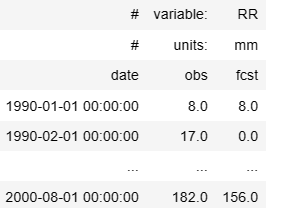

In [23]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
a = pd.read_csv('data/verif_examples/sample_data', sep='\t', skiprows=0, header=0)
a.head()

In [ ]:
a = pd.read_csv('data/verif_examples/sample_data', sep='\t', skiprows=2, header=0)
a1 = a[['date','obs','fcst']]
a1

In [ ]:
a = pd.read_csv('data/verif_examples/sample_data', sep='\t', skiprows=2, header=0)
a1 = a[['date','obs','fcst']]
a1.to_csv('try.txt', sep='\t')

In [ ]:
import verif
from os.path import basename 

# Implement Mean Absolute Error for 2 sample verif data_sets

In [ ]:
!verif data/verif_examples/raw.txt data/verif_examples/kf.txt -m mae -f try.pdf

In [ ]:
from IPython.display import IFrame, display
file = 'sample_data.pdf'
IFrame(file, width=800, height=500)

# Accessing the manual/help on any verif item

In [ ]:
!verif -m taylor

# Produce Taylor Diagrams from a verif file and save as PDF

In [ ]:
for files in ['data/verif_examples/sample_data','data/verif_examples/raw.txt']:
    print(files)

In [ ]:
for files in ['data/verif_examples/sample_data','data/verif_examples/raw.txt']:
    !verif $files -m taylor -fs 10,8 -f img/{basename(files)}.pdf -title (d)
    #!verif $files -m error -xlim 0,100 -ylim -100,100 -fs 5,8 -f {basename(files)}.pdf -title (d)

# With IPython.display, the PDF can be opened as a Frame here

In [ ]:
from IPython.display import IFrame, display
file = 'img/sample_data.pdf'
IFrame(file, width=900, height=500)

# Repeating the Procedure and saving to plot axes

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
!verif C:/Users/UncleJay/Desktop/Projects/WASCAL_TimeSeries_Training/$files -m taylor -fs 10,8 -f {basename(files)}.png 
img = mpimg.imread(basename(files)+'.png')
plt.imshow(img)

In [ ]:
# -xlim 0,6 examples/raw.txt
fig, axes = plt.subplots(ncols=2, figsize=(15,8))
for files in ['data/verif_examples/raw.txt', 'data/verif_examples/sample_data',]:
    !verif $files -m taylor -fs 10,8 -f {basename(files)}.png 
    img = mpimg.imread(basename(files)+'.png')
    axes[0].imshow(img)
    axes[0].set_title('a \n')
    axes[0].set_axis_off()
    
    !verif $files -m error -fs 5,8 -f {basename(files)}.png 
    img = mpimg.imread(basename(files)+'.png')
    axes[1].imshow(img)
    axes[1].set_title('b \n')
    axes[1].set_axis_off()
    
    !del {basename(files)}.png    #Deletes the initial '.png' files created.

# Using Your Own Data

In [13]:
out = pd.DataFrame()
out['obs'] = np.arange(10)
out.loc[-3] = 'Hello'
out

,obs
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [14]:
def file2veriffmt( date, obs, fcst, var='RR', unit='mm'):
    out = pd.DataFrame()
    out['date'] = date
    out['obs'] = obs
    out['fcst'] = fcst
    
    out.loc[-3,:3] = ['#',' variable: ',str(var)]
    out.loc[-2,:3] = ['#',' units: ', str(unit)]
    out.loc[-1,:3] = ['date','obs','fcst']
    out = out.sort_index().reset_index().drop('index', axis=1)

    
    return out

# Let's Test This With a Timeseries Data

In [15]:
locations = [
    ['Tema',0 , 5.7],
    ['Kumasi',-1.5 , 6.7],
    ['Tamale', 0.6, 8.3]
]

for l, loc in enumerate(locations):
    print(l, loc)

0 ['Tema', 0, 5.7]
1 ['Kumasi', -1.5, 6.7]
2 ['Tamale', 0.6, 8.3]


In [16]:
import xarray as xr
da_cru_pre = xr.open_dataset('Africa_cru_data.nc')['pre']

In [20]:


locations = [
    ['Tema',0 , 5.7],
    ['Kumasi',-1.5 , 6.7],
    ['Tamale', 0.6, 8.3]
]


da_GH = da_cru_pre.sel(lon=slice(-3.5,1.5), lat=slice(4.5, 11.5)).mean(['lat','lon'])
    
for l, loc in enumerate(locations):
    da_c = da_cru_pre.sel(lon=loc[1], lat=loc[2], method='nearest')
    
    out = file2veriffmt(date=pd.date_range('19800101', periods=len(da_GH)).strftime('%Y%m%d'), 
             obs = da_c.values.astype(int),
             fcst = da_GH.values.astype(int), 
             var = 'RR',
             unit = 'mm')
    
    out.to_csv(loc[0], sep='\t', header=False, index=False)
    
    

C:\Users\UncleJay\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [21]:
!verif Tema Tamale Kumasi -m taylor -fs 15,8 -f try.pdf

C:\Users\UncleJay\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
from IPython.display import IFrame, display
file = 'try.pdf'
IFrame(file, width=800, height=400)

In [35]:
for l, loc in enumerate(locations):
    da_c = da_cru_pre.sel(lon=loc[1], lat=loc[2], method='nearest')
    
    out = file2veriffmt(date=pd.date_range('19800101', periods=len(da_GH)).strftime('%Y%m%d'), 
             obs = da_c.values.astype(int),
             fcst = da_GH.values.astype(int), 
             var = 'RR',
             unit = 'mm')
    
    out.to_csv(loc[0], sep='\t', header=False, index=False)
    
    
    err_out = file2veriffmt(date=pd.date_range('19800101', periods=len(da_GH)).strftime('%Y%m%d'), 
             obs = da_GH.values.astype(int),
             fcst = da_c.values.astype(int), 
             var = 'RR',
             unit = 'mm')
    
    err_out.to_csv('err_'+loc[0], sep='\t', header=False, index=False)

In [34]:
err_files = ' '.join(['err_'+d for d in np.copy(locations).T[0]])
err_files

'err_Tema err_Kumasi err_Tamale'

C:\Users\UncleJay\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\UncleJay\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


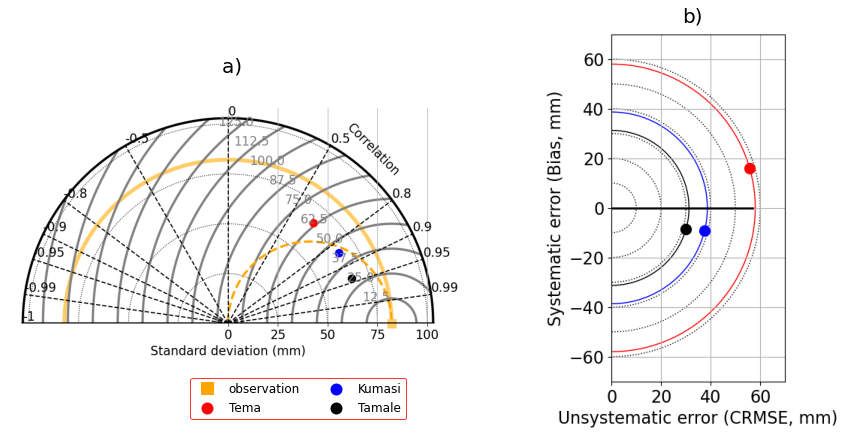

In [43]:
files = ' '.join([d for d in np.copy(locations).T[0]])
err_files = ' '.join(['err_'+d for d in np.copy(locations).T[0]])

mark_size = 10
markers = 'o'

    
fig, axes = plt.subplots(ncols=2, figsize=(15,10), gridspec_kw={'width_ratios':[3,2]})
plt.subplots_adjust(bottom=0.3)
ax = axes[0]
!verif $files -m taylor -f taylor.png -legfs 0 -ma $markers -ms $mark_size -lc red,blue,black,green -fs 10,8 -f taylor.png 
img = mpimg.imread('taylor.png')
ax.imshow(img)
ax.set_title('a) \n', fontsize=20)
ax.set_axis_off()




ax = axes[1]
!verif $err_files -m error -legfs 0 -ma $markers -ms 10 -ylim -70,70 -xlim 0,70 -lc red,blue,black,green -fs 12,6 -f error.png 
img = mpimg.imread('error.png')
ax.imshow(img)
ax.set_title('b)', fontsize=20)
ax.set_axis_off()



#import matplotlib.patches as mpatches
colors = ['orange','red','blue','black','green']
ylabels = locations


p = list(np.copy(locations).T[0])
p.insert(0, 'observation')

handles = [(plt.scatter([], [], color=colors[x], marker=markers, edgecolor='k', linewidth=0)) if x>=1 else 
           (plt.Line2D([], [], color='orange', marker='s', linewidth=0))
           for x,y in enumerate(p)]


#line, = plt.plot([1,3,2], marker='o', label='something')
fig.legend(handles = handles, labels=list(p), markerscale=2, ncol=2, 
           bbox_to_anchor=(0.5, 0.395), edgecolor='r',  fontsize=12 )



# <font color='red'>THE END</font>
# <font color='blue'>Thanks for Joining The Session </font>